In [2]:
# External imports
import numpy as np
import time
import matplotlib.pyplot as plt

# Own imports
from packages.func import func
import tensorflow as tf
from sklearn.model_selection import train_test_split

# # White noise
# mean = 0
# std = 1 
# num_samples = 1000
# samples = np.random.normal(mean, std, size=num_samples)

# t0 = time.time()
# cool_func = func("2 + 3*sin(x/2) + exp(x)^cos(x/3)")
# t1 = time.time()
# print(cool_func.eval(np.pi))
# t2 = time.time()

# print("Time to define: ", t1-t0, "s", sep="")
# print("Time to eval: ", t2-t1, "s", sep="")

# # Sympy
# import numpy as np
# import time
# from sympy import symbols, sin, exp, cos, lambdify

# t0 = time.time()
# x = symbols('x')
# expr = 2 + 3*sin(x/2) + exp(x)**cos(x/3)
# cool_func = lambdify(x, expr)
# t1 = time.time()
# print(cool_func(np.pi))
# t2 = time.time()

# print("Time to define: ", t1-t0, "s", sep="")
# print("Time to eval: ", t2-t1, "s", sep="")


# Defining basis functions:

#basis_functions = ['c', 'x', 'cos', 'exp']

def plot_sample(X):

    num_samples = 100
    start = -10
    end = 10
    step = (end - start)/100
    eval_points = np.arange(start, end, step)

    plt.plot(eval_points,X)
    plt.show()

def generate_sample(f: func) -> (np.array, np.array):

    basis_function = f.get_value()
    y = np.zeros(len(basis_functions))
    for i in range(len(y)):
        if basis_functions[i] == basis_function:
            y[i] = 1

    # mean = np.random.uniform(-0.1, 0.1, 1)
    mean = 0
    std = np.random.uniform(0.1, 0.3, 1)

    num_samples = 100
    start = -10
    end = 10
    step = (end - start)/100
    eval_points = np.arange(start, end, step)

    X = []
    for point in eval_points:
        X.append(f.eval(point))

    noise = np.random.normal(mean, std, size=num_samples)
    X = X + noise

    return np.array(X), np.array(y)

def generate_samples(f_list: list[func], num_samples: int | list[int], shuffle: bool = True) -> (np.array, np.array):
    X_train = []
    y_train = []

    if isinstance(num_samples, int):
        num_samples = [num_samples] * len(f_list)

    for f_ind, f in enumerate(f_list):
        curr_num = num_samples[f_ind]
        for _ in range(curr_num):
            X, y = generate_sample(f)
            X_train.append(X)
            y_train.append(y)

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    if shuffle:
        idx = np.random.permutation(len(X_train))
        return X_train[idx], y_train[idx]

    return X_train, y_train


basis_functions = ['0', 'x', 'x^2', 'x^3', 'sin(x)', 'exp(x)', 'cos(x)']
f_list = []
for f in basis_functions:
    f_list.append(func(f))

X, y = generate_samples(f_list, 1000)


def vanilla_neural_network(input_shape, output_num):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(output_num, activation='softmax')
    ])

    return model

model = vanilla_neural_network(np.shape(X[0]), np.shape(y)[1])


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using X_train_new
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, steps_per_epoch=100)



2023-12-03 01:07:32.546743: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-03 01:07:32.572577: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 01:07:32.572603: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 01:07:32.573284: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 01:07:32.577552: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/10


2023-12-03 01:07:35.634289: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 01:07:35.656607: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-03 01:07:35.656754: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

100/100 [==============================] - 1s 3ms/step - loss: 6.5386 - accuracy: 0.9459
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 2.9957e-04 - accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 0s 3ms/step - loss: 1.0110e-04 - accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 0s 3ms/step - loss: 6.4456e-05 - accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 0s 2ms/step - loss: 3.6729e-05 - accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 0s 2ms/step - loss: 2.5235e-05 - accuracy: 1.0000
Epoch 8/10
100/100 [==============================] - 0s 2ms/step - loss: 1.8378e-05 - accuracy: 1.0000
Epoch 9/10
100/100 [==============================] - 0s 2ms/step - loss: 1.4925e-05 - accuracy: 1.0000
Epoch 10/10
100/100 [==============================] - 0s 2ms/step - loss: 1.1034e-

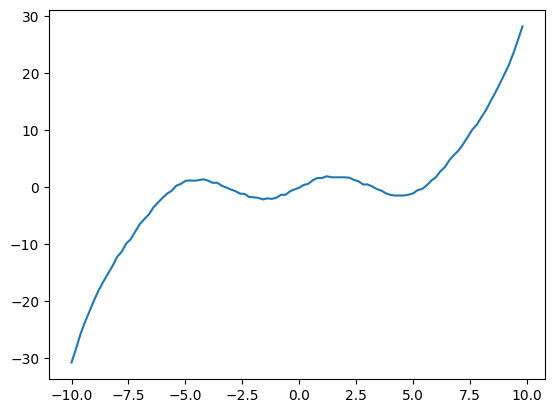

1/1 [==============================] - 0s 13ms/step
[[0.046 0.051 0.    0.451 0.003 0.107 0.342]
 [0.021 0.051 0.    0.456 0.004 0.111 0.357]
 [0.032 0.09  0.    0.484 0.002 0.096 0.297]
 [0.027 0.053 0.    0.441 0.005 0.105 0.368]
 [0.008 0.043 0.    0.388 0.005 0.101 0.455]
 [0.105 0.029 0.    0.352 0.006 0.078 0.43 ]
 [0.071 0.049 0.    0.502 0.003 0.083 0.291]
 [0.025 0.041 0.    0.498 0.003 0.091 0.343]
 [0.047 0.041 0.    0.446 0.004 0.075 0.387]
 [0.015 0.053 0.    0.45  0.004 0.09  0.388]
 [0.01  0.047 0.    0.45  0.004 0.108 0.381]
 [0.006 0.045 0.    0.465 0.004 0.12  0.36 ]
 [0.017 0.04  0.    0.477 0.006 0.102 0.358]
 [0.024 0.057 0.    0.496 0.003 0.081 0.339]
 [0.037 0.037 0.    0.381 0.005 0.083 0.457]
 [0.01  0.045 0.    0.335 0.005 0.101 0.504]
 [0.059 0.052 0.    0.503 0.003 0.074 0.311]
 [0.009 0.055 0.    0.429 0.005 0.128 0.374]
 [0.088 0.046 0.    0.489 0.004 0.075 0.297]
 [0.11  0.042 0.    0.48  0.003 0.072 0.294]]
Number of rows where max(y_test)[row] == max(y_

In [4]:

# Test the model on X_test
# y_pred = model.predict(X_test)
X_test, y_test = generate_samples([func("(x*0.2)^5 + 2*sin(x)")], 20)
plot_sample(X_test[0])
y_pred = model.predict(X_test)

print(np.around(y_pred, 3))

# Compare mean squared error of y_test and y_pred

count = 0
for i in range(len(y_test)):
    if np.argmax(y_test[i]) == np.argmax(y_pred[i]):
        count += 1

print("Number of rows where max(y_test)[row] == max(y_pred[row]):", count)
print("Number of rows where max(y_test)[row] != max(y_pred[row]):", len(y_test) - count)

